# En este notebook vamos a responder a las siguientes preguntas:
- ¿En qué comunas de Santiago se concentran los mejores puntajes (>= 80% logro) y cómo relacionamos esto a los tipos de colegios en cada comuna?

- ¿Han cambiado los promedios de puntajes en el cambio de PSU, PDT y PAES, y si estos determinan un cambio en la forma de medir el rendimiento estudiantil o más bien un cambio real en el desempeño de estos? A considerar el cambio de escala de PSU a PAES.

- ¿Qué factores académicos y socioeconómicos (NEM, Ranking, Tipo de Colegio) predicen la probabilidad de que un estudiante obtenga un Puntaje de Excelencia (Top 5%) a lo largo del periodo 2004-2025?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("../data/datos_procesados.parquet", engine="pyarrow")

escalas = {'PSU': 850, 'PDT': 850, 'PAES': 1000}

pruebas_a_normalizar = ['puntaje_lectora', 'puntaje_m1', 'puntaje_m2', 'puntaje_historia', 'puntaje_ciencias']

for prueba in pruebas_a_normalizar:
    df[f'%_{prueba}'] = np.nan
    for nombre, maximo in escalas.items():
        # Usamos df.loc para aplicar la división solo en las filas
        # donde la columna 'prueba' coincide con la llave
        df.loc[df['prueba'] == nombre, f'%_{prueba}'] = df[prueba] / maximo

# No vamos a incluir puntaje_m2 en el cálculo del promedio general, esto porrque fue incluida solo en la PAES y nos enfocaremos en las pruebas comunes.
df['%_Rendidas'] = df[['%_puntaje_lectora', '%_puntaje_m1', '%_puntaje_historia', '%_puntaje_ciencias']].mean(axis=1)

C:\Users\UsuarioCompuElite\AppData\Local\Temp\ipykernel_6872\2387265118.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<FloatingArray>
[ 0.5517647058823529,  0.5788235294117647,                0.46,
  0.4152941176470588,  0.5058823529411764,  0.4235294117647059,
 0.39647058823529413,  0.7694117647058824,  0.5235294117647059,
  0.4152941176470588,
 ...
  0.5247058823529411, 0.35764705882352943,  0.5611764705882353,
                <NA>,  0.4976470588235294,  0.5023529411764706,
  0.6576470588235294,  0.4788235294117647,  0.4470588235294118,
  0.7023529411764706]
Length: 4050782, dtype: Float64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['prueba'] == nombre, f'%_{prueba}'] = df[prueba] / maximo
C:\Users\UsuarioCompuElite\AppData\Local\Temp\ipykernel_6872\2387265118.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and w

In [3]:
# Limpiamos los códigos de comuna para que sean strings sin decimales, y filtramos por la región Metropolitana.

df['cod_comuna'] = df['cod_comuna'].astype(str).str.replace('\\.0', '', regex=True)

df_metropolitana = df[(df['cod_region'] == 13.0) & (df['cod_comuna'].str.startswith('13'))]

In [4]:
df_metropolitana.cod_comuna.nunique()

52

In [5]:
df_metropolitana

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,...,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba,%_puntaje_lectora,%_puntaje_m1,%_puntaje_m2,%_puntaje_historia,%_puntaje_ciencias,%_Rendidas
153982,id_0000900970054,NaN,Particular Pagado,CH nocturno,Ant:Nacional-Regular,13.0,13101,589.0,569.0,<NA>,...,NaN,<NA>,68.12,PSU,0.692941,0.669412,<NA>,<NA>,0.537647,0.633333
153984,id_0009900270955,NaN,Particular Pagado,CH nocturno,Act:Nacional-Regular,13.0,13123,361.0,405.0,350.0,...,NaN,<NA>,45.06,PSU,0.424706,0.476471,<NA>,0.411765,<NA>,0.437647
153985,id_0009900270956,NaN,Particular Subvencionado,TP comercial,Act:Nacional-Regular,13.0,13127,490.0,470.0,574.0,...,NaN,<NA>,56.47,PSU,0.576471,0.552941,<NA>,0.675294,<NA>,0.601569
153986,id_0009900270976,NaN,Municipal,TP servicios y técnica,Act:Nacional-Regular,13.0,13126,422.0,450.0,469.0,...,NaN,<NA>,51.29,PSU,0.496471,0.529412,<NA>,0.551765,<NA>,0.525882
153988,id_0021900272149,NaN,Municipal,CH diurno,Act:Nacional-Regular,13.0,13101,796.0,739.0,<NA>,...,NaN,<NA>,90.29,PSU,0.936471,0.869412,<NA>,<NA>,0.868235,0.891373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455225,id_666661641326,8616.0,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,13.0,13108,<NA>,<NA>,<NA>,...,1000.0,<NA>,<NA>,PAES,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5455230,id_8999869944696,10255.0,Municipal,TP servicios y técnica,Act:Nacional-Regular,13.0,13127,<NA>,<NA>,<NA>,...,NaN,<NA>,<NA>,PAES,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5455231,id_9599985046465,8508.0,Municipal,TP comercial,Act:Nacional-Regular,13.0,13126,<NA>,<NA>,<NA>,...,NaN,<NA>,<NA>,PAES,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5455232,id_5995599440825,9986.0,Municipal,TP comercial,Act:Nacional-Regular,13.0,13126,<NA>,<NA>,<NA>,...,NaN,<NA>,<NA>,PAES,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [6]:
DICC_COMUNAS_RM = {
    # Provincia de Santiago
    13101: 'Santiago',
    13102: 'Cerrillos',
    13103: 'Cerro Navia',
    13104: 'Conchalí',
    13105: 'El Bosque',
    13106: 'Estación Central',
    13107: 'Huechuraba',
    13108: 'Independencia',
    13109: 'La Cisterna',
    13110: 'La Florida',
    13111: 'La Granja',
    13112: 'La Pintana',
    13113: 'La Reina',
    13114: 'Las Condes',
    13115: 'Lo Barnechea',
    13116: 'Lo Espejo',
    13117: 'Lo Prado',
    13118: 'Macul',
    13119: 'Maipú',
    13120: 'Ñuñoa',
    13121: 'Pedro Aguirre Cerda',
    13122: 'Peñalolén',
    13123: 'Providencia',
    13124: 'Pudahuel',
    13125: 'Quilicura',
    13126: 'Quinta Normal',
    13127: 'Recoleta',
    13128: 'Renca',
    13129: 'San Joaquín',
    13130: 'San Miguel',
    13131: 'San Ramón',
    13132: 'Vitacura', 
    13201: 'Puente Alto',
    13202: 'Pirque',
    13203: 'San José de Maipo',
    13301: 'Colina',
    13302: 'Lampa',
    13303: 'Tiltil',
    13401: 'San Bernardo',
    13402: 'Buin',
    13403: 'Calera de Tango',
    13404: 'Paine',
    13501: 'Melipilla',
    13502: 'Alhué',
    13503: 'Curacaví',
    13504: 'María Pinto',
    13505: 'San Pedro',
    13601: 'Talagante',
    13602: 'El Monte',
    13603: 'Isla de Maipo',
    13604: 'Padre Hurtado',
    13605: 'Peñaflor'}

- Para efectos de considerar un puntaje de excelencia consideramos un porcentaje de logro superior al 80%, este considera solo las pruebas rendidas.

In [7]:
df_metropolitana_mejores = df_metropolitana[df_metropolitana['%_Rendidas'] >= 0.8]

conteo = df_metropolitana_mejores.value_counts('cod_comuna').reset_index()

conteo['comuna'] = conteo['cod_comuna'].astype(int).map(DICC_COMUNAS_RM)

In [8]:
conteo = conteo.rename(columns={conteo.columns[1]: 'Conteo_Total'})

df_top_10_comunas = conteo.copy().sort_values(by='Conteo_Total', ascending=False).head(10)

C:\Users\UsuarioCompuElite\AppData\Local\Temp\ipykernel_6872\1547304089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


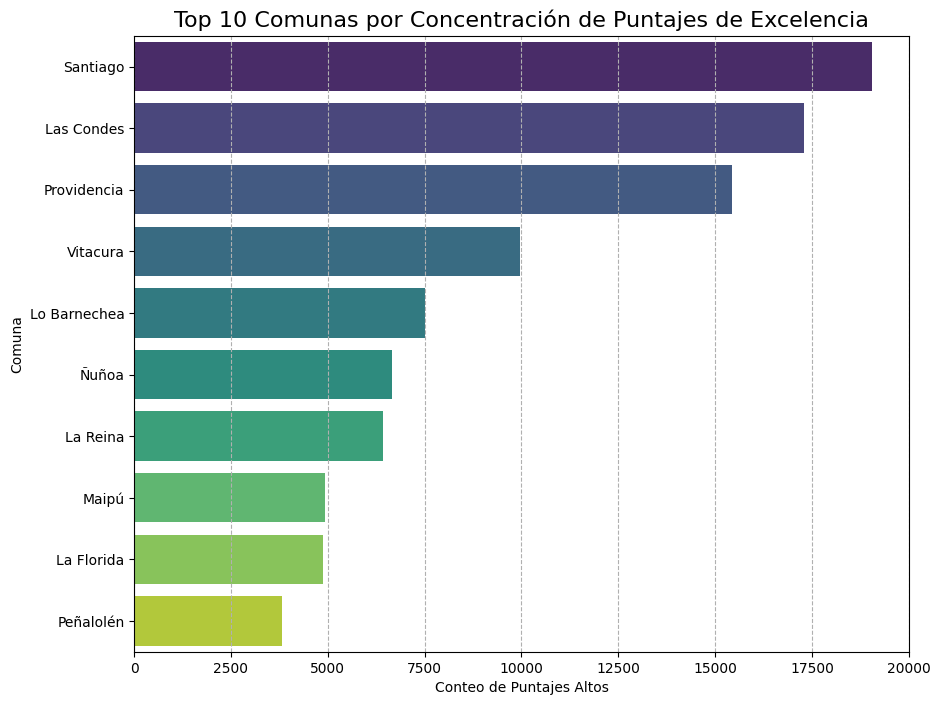

In [9]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_top_10_comunas,
    y='comuna',
    x='Conteo_Total', 
    palette='viridis')

plt.title('Top 10 Comunas por Concentración de Puntajes de Excelencia', fontsize=16)
plt.xlabel('Conteo de Puntajes Altos')
plt.ylabel('Comuna')
plt.grid(axis='x', linestyle='--')
plt.show()

- Vemos que los puntajes de excelencia se suelen concentrar en comunas como Santiago, Las Condes o Providencia, lo cual puede sugerir alguna realación de los mejores puntajes con la cantidad de establecimientos privados que hay en la comuna.

C:\Users\UsuarioCompuElite\AppData\Local\Temp\ipykernel_6872\1568440459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


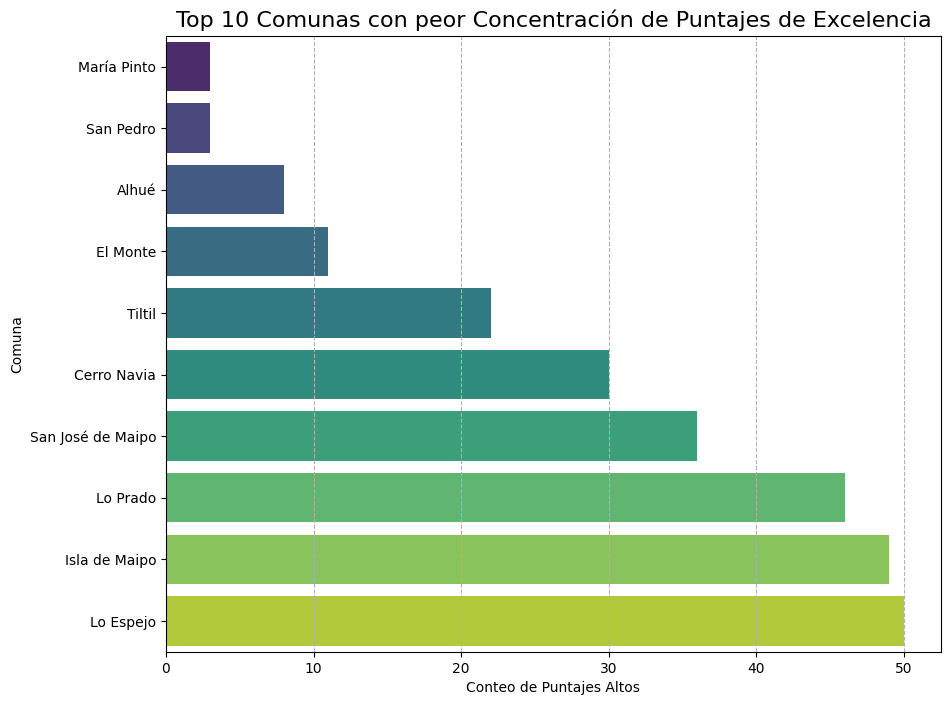

In [10]:
df_last_10_comunas = conteo.sort_values(by='Conteo_Total', ascending=True).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_last_10_comunas,
    y='comuna',
    x='Conteo_Total', 
    palette='viridis')

plt.title('Top 10 Comunas con peor Concentración de Puntajes de Excelencia', fontsize=16)
plt.xlabel('Conteo de Puntajes Altos')
plt.ylabel('Comuna')
plt.grid(axis='x', linestyle='--')
plt.show()

- Por otra parte vemos las comunas que concentran una menor cantidad de puntajes de excelencia, siendo estas generalmente comunas muy pequeñas o alejadas del centro, como San Pedro, lo cual explica estos resultados.

In [11]:
df_metropolitana.dependencia_colegio.unique()

array(['Particular Pagado', 'Particular Subvencionado', 'Municipal',
       'Servicio Local de Educación'], dtype=object)

- Ahora estaremos creando un df con la información de las comunas juntas para ver si existe una relación con la cantidad de cada tipo de establecimiento en cada comuna.

In [12]:
comunas = df_metropolitana.groupby('cod_comuna').agg(
    Promedio_Notas=('promedio_notas', 'mean'),
    Promedio_Lectora=('%_puntaje_lectora', 'mean'),
    Promedio_M1=('%_puntaje_m1', 'mean'),
    Promedio_Ciencias=('%_puntaje_ciencias', 'mean'),
    Promedio_Historia = ('%_puntaje_historia', 'mean'),
    Promedio_M2 = ('%_puntaje_m2', 'mean'),
    Total_establecimientos = ('id_colegio_rbd', 'nunique')).reset_index().sort_values(by='cod_comuna')

comunas['comuna'] = comunas['cod_comuna'].astype(int).map(DICC_COMUNAS_RM)
comunas['promedio_resultados'] = comunas[['Promedio_Lectora', 'Promedio_M1', 'Promedio_Ciencias', 'Promedio_Historia']].mean(axis=1)

df_unique_colegios = df_metropolitana.drop_duplicates(subset=['id_colegio_rbd'])[['cod_comuna', 'dependencia_colegio']].copy()

# Contamos los establecimientos por tipo de dependencia en cada comuna
df_conteo_establecimientos = pd.crosstab(
    df_unique_colegios['cod_comuna'],
    df_unique_colegios['dependencia_colegio']).reset_index()

# Unimos los datos
comunas_final = pd.merge(comunas, df_conteo_establecimientos, on='cod_comuna', how='left')

comunas_final

,cod_comuna,Promedio_Notas,Promedio_Lectora,Promedio_M1,Promedio_Ciencias,Promedio_Historia,Promedio_M2,Total_establecimientos,comuna,promedio_resultados,Municipal,Particular Pagado,Particular Subvencionado,Servicio Local de Educación
0,13101,5.701551,0.626165,0.617267,0.617993,0.624031,0.434832,103,Santiago,0.621364,26,18,57,0
1,13102,5.569135,0.574753,0.577808,0.557888,0.572064,0.404152,12,Cerrillos,0.570629,1,0,11,0
2,13103,5.591735,0.503875,0.506041,0.487246,0.511038,0.379184,12,Cerro Navia,0.50205,4,0,7,1
3,13104,5.560597,0.553885,0.542526,0.531064,0.553783,0.38676,12,Conchalí,0.545315,4,0,8,0
4,13105,5.667113,0.585107,0.579521,0.575519,0.575245,0.404861,28,El Bosque,0.578848,7,0,20,0
5,13106,5.648001,0.581893,0.576278,0.568718,0.580076,0.406651,21,Estación Central,0.576741,5,1,14,0
6,13107,5.904440,0.618254,0.633502,0.611349,0.597494,0.477372,11,Huechuraba,0.61515,1,6,4,0
7,13108,5.648181,0.556696,0.550913,0.5566,0.553537,0.399697,24,Independencia,0.554436,4,1,19,0
8,13109,5.636189,0.572468,0.566197,0.564799,0.565649,0.392983,31,La Cisterna,0.567278,5,1,23,0
9,13110,5.695620,0.613261,0.606326,0.597484,0.609753,0.428325,98,La Florida,0.606706,12,12,74,0


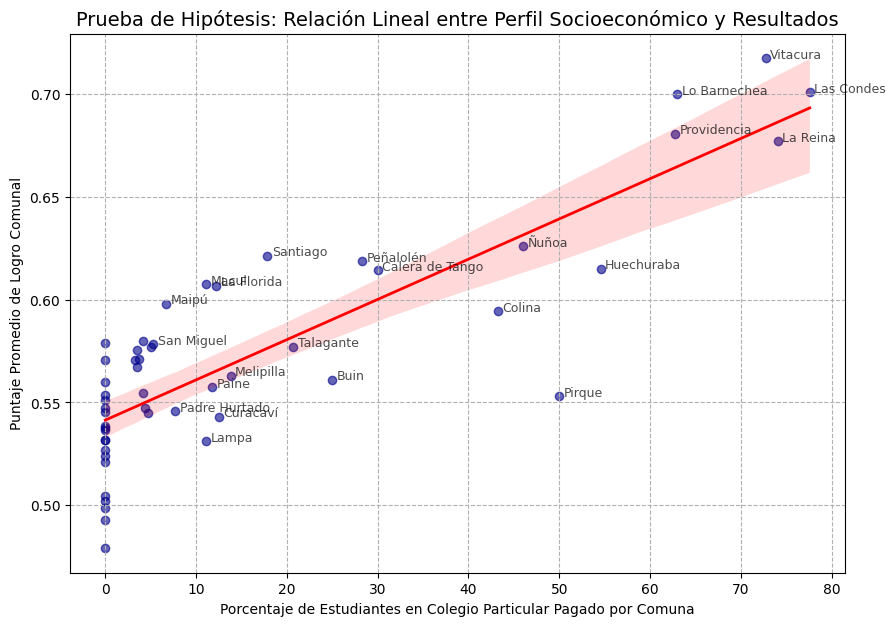

In [13]:
# 1. Calculamos el porcentaje de estudiantes en colegios particulares pagados por comuna
comunas_final['Total_Establecimientos_Comunal'] = comunas_final[['Municipal', 'Particular Pagado', 'Particular Subvencionado']].sum(axis=1)

comunas_final['Pct_Particular_Pagado'] = (comunas_final['Particular Pagado'] / comunas_final['Total_Establecimientos_Comunal']) * 100

# Generamos el grafico de dispersión para ver alguna relación visual, ademas de la línea de regresión.
plt.figure(figsize=(10, 7))
sns.regplot(
    data=comunas_final,
    x='Pct_Particular_Pagado',
    y='promedio_resultados',
    line_kws={'color': 'red', 'lw': 2},
    scatter_kws={'alpha': 0.6, 'color': 'darkblue'})

# Etiquetamos solo las comunas_final con > 5% de particulares pagados
for i, row in comunas_final.iterrows():
    if row['Pct_Particular_Pagado'] > 5:
        plt.text(row['Pct_Particular_Pagado'] + 0.5, row['promedio_resultados'], row['comuna'], fontsize=9, alpha=0.7)

plt.title('Prueba de Hipótesis: Relación Lineal entre Perfil Socioeconómico y Resultados', fontsize=14)
plt.xlabel('Porcentaje de Estudiantes en Colegio Particular Pagado por Comuna')
plt.ylabel('Puntaje Promedio de Logro Comunal')
plt.grid(True, linestyle='--')
plt.show()

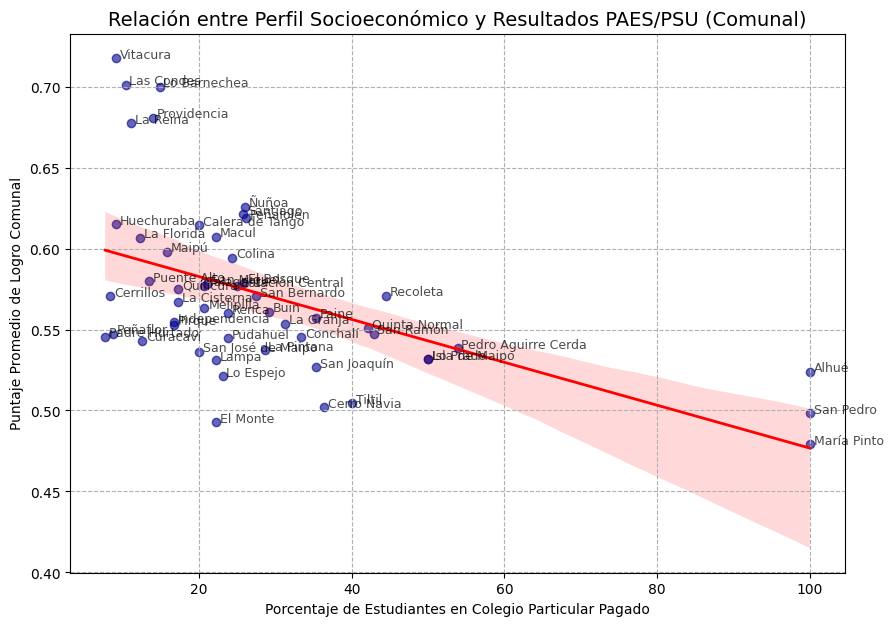

In [14]:
comunas_final['Pct_Municipal'] = (comunas_final['Municipal'] / comunas_final['Total_Establecimientos_Comunal']) * 100

plt.figure(figsize=(10, 7))
sns.regplot(
    data=comunas_final,
    x='Pct_Municipal',
    y='promedio_resultados',
    line_kws={'color': 'red', 'lw': 2},
    scatter_kws={'alpha': 0.6, 'color': 'darkblue'})

for i, f in comunas_final.iterrows():
    if f['Pct_Municipal'] > 5:
        plt.text(f['Pct_Municipal'] + 0.5, f['promedio_resultados'], f['comuna'], fontsize=9, alpha=0.7)

plt.title('Relación entre Perfil Socioeconómico y Resultados PAES/PSU (Comunal)', fontsize=14)
plt.xlabel('Porcentaje de Estudiantes en Colegio Particular Pagado')
plt.ylabel('Puntaje Promedio de Logro Comunal')
plt.grid(True, linestyle='--')
plt.show()

- Después de ver los graficos, podemos ver una relación bastante evidente, mientras más colegios municipales haya en la comuna, menor promedio en cuanto a rendimiento habrá, en cambio, al tener una mayor cantidad de colegios particulares, mayor porcentaje de logro se obtendrá en las pruebas.

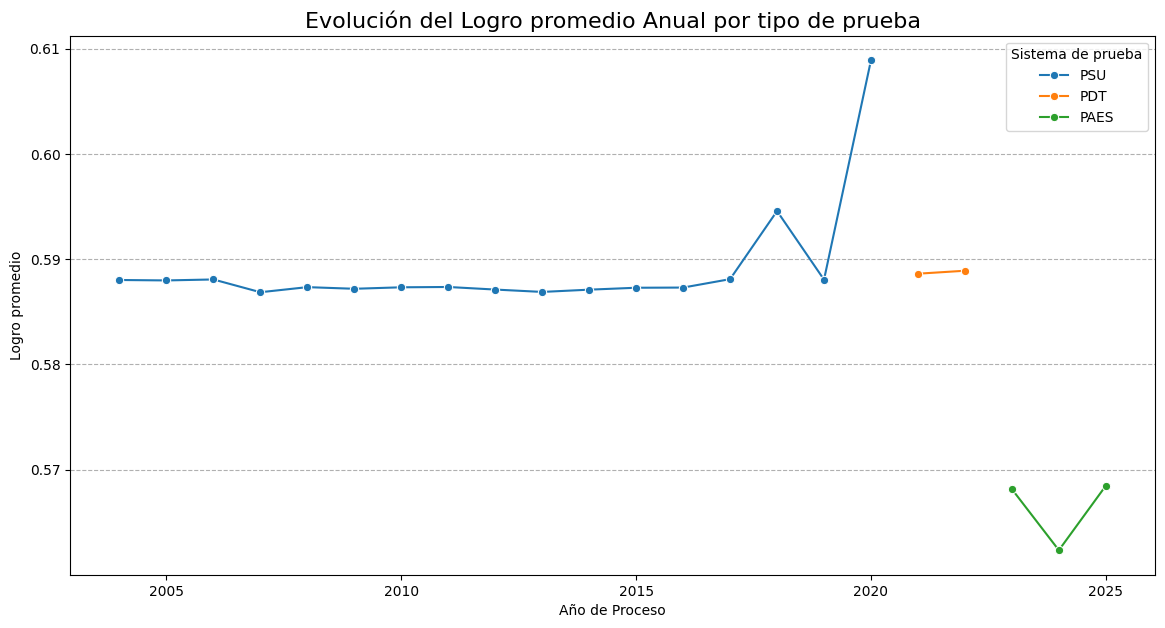

In [15]:
df_evolucion = df.groupby('year_proceso').agg(
    Mediana_Logro=('%_Rendidas', 'mean'),
    prueba=('prueba', 'first')).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_evolucion, 
    x='year_proceso', 
    y='Mediana_Logro', 
    hue='prueba', 
    marker='o',
    errorbar=None)

plt.title('Evolución del Logro promedio Anual por tipo de prueba', fontsize=16)
plt.ylabel('Logro promedio')
plt.xlabel('Año de Proceso')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Sistema de prueba')
plt.show()

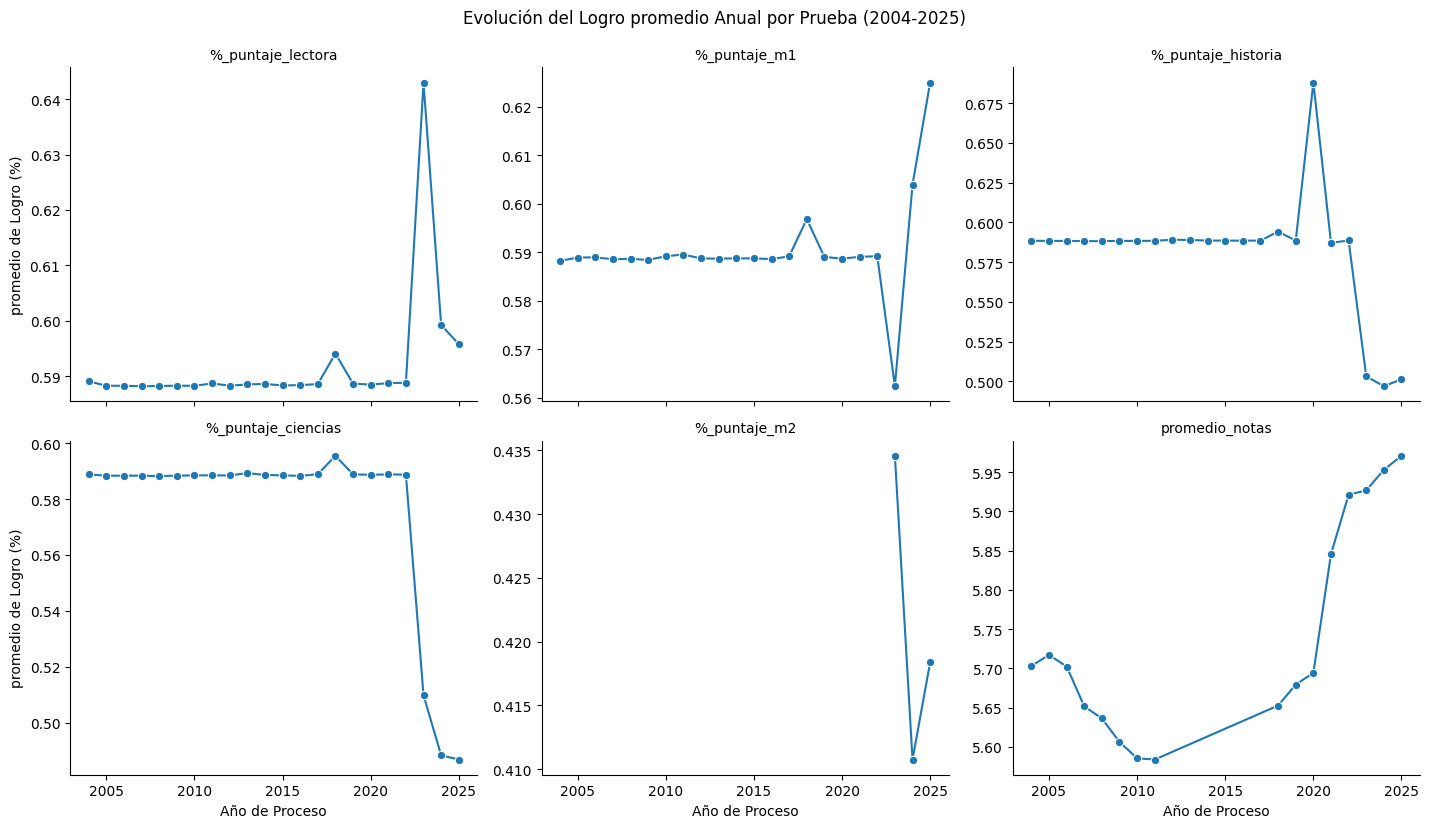

In [16]:
LOGRO_COLS = [
    '%_puntaje_lectora', 
    '%_puntaje_m1', 
    '%_puntaje_historia', 
    '%_puntaje_ciencias',
    '%_puntaje_m2',
    'promedio_notas']

df_agregado = df.groupby('year_proceso')[LOGRO_COLS].mean().reset_index()

df_long = df_agregado.melt(
    id_vars='year_proceso', 
    value_vars=LOGRO_COLS, 
    var_name='Prueba_Sujeto',
    value_name='Media_Logro')

grafico = sns.relplot(
    data=df_long,
    x='year_proceso',
    y='Media_Logro',
    col='Prueba_Sujeto',
    kind='line',
    col_wrap=3,
    marker='o',
    height=4,
    aspect=1.2,
    facet_kws={'sharey': False})

grafico.fig.suptitle('Evolución del Logro promedio Anual por Prueba (2004-2025)', y=1.03)
grafico.set_axis_labels('Año de Proceso', 'promedio de Logro (%)')
grafico.set_titles(col_template='{col_name}')
plt.show()

- Los promedios de puntajes sí cambian cuando pasamos de PSU a PDT y luego a PAES, pero esos saltos no se deben a que los estudiantes hayan aprendido más o menos de un año para otro. Lo que realmente cambia es la forma en que se mide, cada prueba usa escalas y criterios distintos, así que los puntajes dejan de ser comparables entre sistemas. Esos aumentos o caídas bruscas que se ven en los gráficos reflejan modificaciones de la forma de medir, no del rendimiento real. Las notas, en cambio, se mantienen estables, lo que confirma que el desempeño estudiantil no cambió de manera drástica. Esto muestra que lo que varió fue el sistema de evaluación, no el aprendizaje.

In [17]:
# Las columnas de porcentaje de logro que ya tienes normalizadas
LOGRO_COLS = [
    '%_puntaje_lectora', 
    '%_puntaje_m1', 
    '%_puntaje_m2', 
    '%_puntaje_historia', 
    '%_puntaje_ciencias']

# Sacamos el máximo logro individual entre las pruebas para cada estudiante
df['Max_Logro_Individual'] = df[LOGRO_COLS].max(axis=1)

# Definimos la nueva variable objetivo
df['Alumno_Excelencia'] = (df['Max_Logro_Individual'] >= 0.95)

In [18]:
df_excelencia = df[(df['Alumno_Excelencia'] == True)]

In [19]:
mi_amigo_thomy = df[(df['id_estudiante'] == 'id_5518555571878')]
mi_amigo_thomy

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,...,%_de_logro_obligatorias,prueba,%_puntaje_lectora,%_puntaje_m1,%_puntaje_m2,%_puntaje_historia,%_puntaje_ciencias,%_Rendidas,Max_Logro_Individual,Alumno_Excelencia
5339219,id_5518555571878,8769.0,Particular Pagado,CH diurno,Act:Nacional-Regular,13.0,13108,746.0,915.0,<NA>,...,83.05,PAES,0.746,0.915,0.571,<NA>,0.64,0.767,0.915,False


- Usaremos un árbol de decisión para ver la predicción de los alumnos de excelencia.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score
import numpy as np

COLUMNAS_MODELO = [
    'Alumno_Excelencia',
    'promedio_notas', 
    'puntaje_ranking', 
    'dependencia_colegio',
    'rama_educacional',     
    'situacion_egreso']

# Botamos los NAn para que no nos den problemas en el árbol
df_modelo = df[COLUMNAS_MODELO].copy()
df_modelo.dropna(inplace=True)

y = df_modelo['Alumno_Excelencia'] 
categoricas = ['dependencia_colegio', 'rama_educacional', 'situacion_egreso']

# Creamos los fetureds con One-Hot Encoding
X = pd.get_dummies(
    df_modelo.drop(columns=['Alumno_Excelencia']), 
    columns=categoricas,
    drop_first=True)

# dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Creamos el árbol de decisión y las variables a probar
arbol = DecisionTreeClassifier(random_state=42)
parametros = {'max_depth': np.arange(3, 15)}

# Priorizamos el recall para quedarnnos con los alumnos de excelencia
grid_tree = GridSearchCV(arbol, parametros, cv=5, scoring='recall', n_jobs=-1) 
grid_tree.fit(X_train, y_train)
mejor_arbol = grid_tree.best_estimator_
y_pred = mejor_arbol.predict(X_test)

# Creamos el top 5 de features importantes
feature_importances = pd.Series(mejor_arbol.feature_importances_, index=X.columns).sort_values(ascending=False).head(5)

reporte = classification_report(y_test, y_pred, output_dict=True)

# Sacamos el recall para nuestra respuesta
recall_valor = reporte.get('1', {}).get('recall', 0.0)
recall_display = f"{recall_valor:.4f}"


print("-"*60)
print(f"Accuracy Global: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall Clase Excelencia: {recall_display}") 
print("\n--- TOP 5 FACTORES PREDICTIVOS ---")
print(feature_importances)
print("-"*60)

------------------------------------------------------------
Accuracy Global: 0.9825
Recall Clase Excelencia: 0.0000

--- TOP 5 FACTORES PREDICTIVOS ---
promedio_notas                           0.456816
puntaje_ranking                          0.282304
dependencia_colegio_Particular Pagado    0.188588
situacion_egreso_Act:Nacional-Regular    0.017420
rama_educacional_CH nocturno             0.014229
dtype: float64
------------------------------------------------------------


- El modelo de clasificación muestra que la variable que mejor predice un puntaje de excelencia es el promedio de notas, aportando un 45.7% del poder predictivo. Luego viene el puntaje de ranking con un 28.2%. Pero lo más impactante es que estudiar en un colegio Particular Pagado aparece como el tercer factor más influyente, con un 18.8%. Esto respalda la hipótesis sobre que llegar a la excelencia no depende solo del esfuerzo individual reflejado en el promedio y el ranking, sino también de un componente asociado al nivel socioeconómico del establecimiento. Ese factor pesa más que la rama educacional o el tipo de egreso. Por otro lado, el modelo no logró un buen desempeño en recall. Esto era esperable, porque la clase que queremos predecir es minoritaria y el modelo tiene dificultades para ajustarse a ese desbalance. Aun así, las métricas que realmente nos interesaban para el objetivo del proyecto sí fueron alcanzadas.